# 와인 분류

In [1]:
## 필요모듈 import
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
## 데이터 로드
data = load_wine()

## 지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

1. Feature Data 지정하기  
2. Label Data 지정하기  
3. Target Names 출력해 보기  
4. 데이터 Describe 해 보기  

In [3]:
##데이터 DESCRIPTION 
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [4]:
##편리한 처리를 위해 DataFrame으로 변환
import pandas as pd
df = pd.concat([pd.DataFrame(data.data, columns=data.feature_names), pd.DataFrame(data.target, columns=['target'])], axis=1)


In [5]:
##결측치 제거 
df = df.dropna().reset_index(drop=True)

['class_0' 'class_1' 'class_2']
데이터의 갯수는 178개 입니다.

데이터의 label분포는 
 1    71
0    59
2    48
Name: target, dtype: int64 입니다.



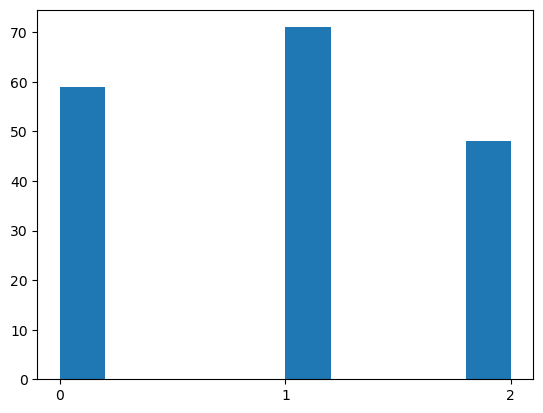

In [6]:
## print(data count)

print(data.target_names)

print(f"데이터의 갯수는 {len(df)}개 입니다.\n")

## print(label count)
print(f"데이터의 label분포는 \n {df['target'].value_counts()} 입니다.\n")

plt.hist(df['target'])
plt.xticks([0,1,2])
plt.show()

<AxesSubplot:>

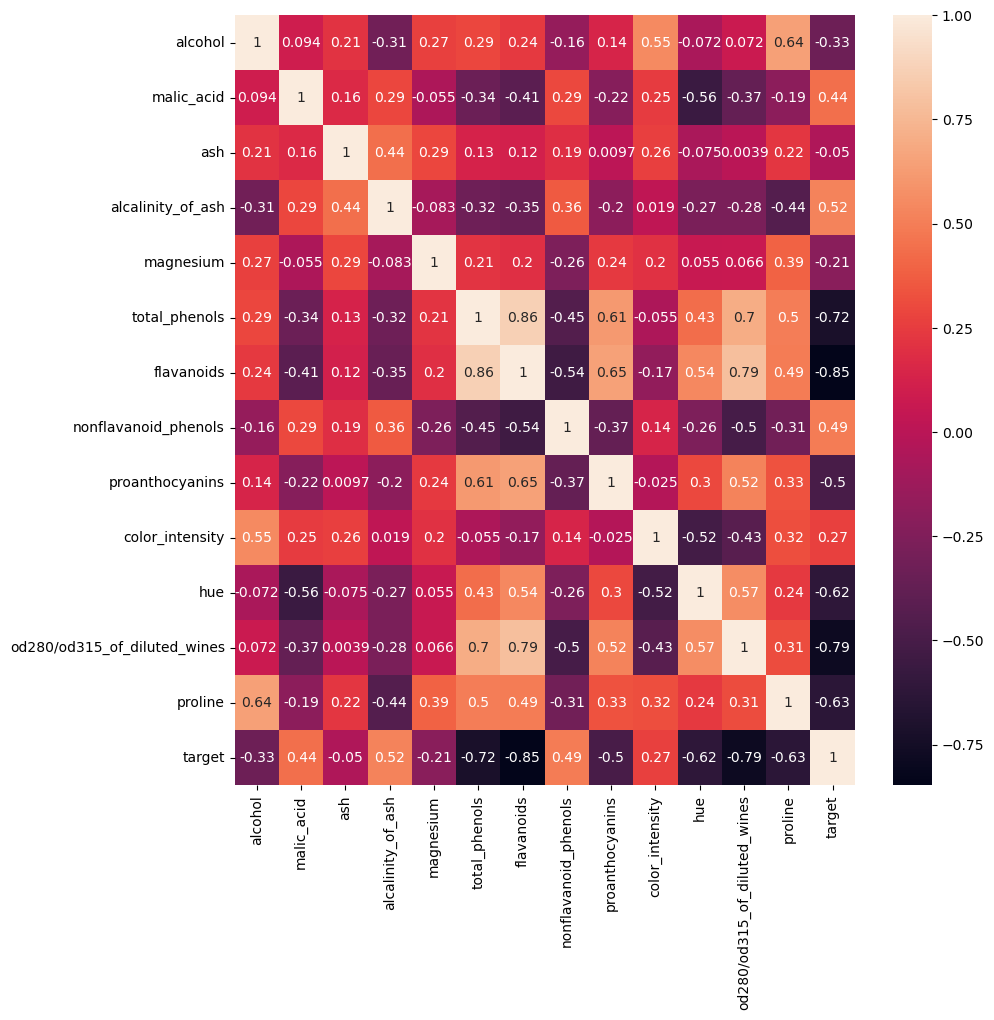

In [7]:
## 상관관계 분석 Heatmap 시작화 Target 변수와의 상관관계 다중공선확인하기
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [8]:
## Target과 관련이 높은 featrue 확인
df.corr()['target'].sort_values(ascending=False)

target                          1.000000
alcalinity_of_ash               0.517859
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
color_intensity                 0.265668
ash                            -0.049643
magnesium                      -0.209179
alcohol                        -0.328222
proanthocyanins                -0.499130
hue                            -0.617369
proline                        -0.633717
total_phenols                  -0.719163
od280/od315_of_diluted_wines   -0.788230
flavanoids                     -0.847498
Name: target, dtype: float64

In [9]:
df.iloc[:,:-1]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [10]:
## 공분산성 확인해보기
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as  pd 
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(
    df.iloc[:,:-1].values, i) for i in range(df.iloc[:,:-1].shape[1])]
vif["features"] = df.iloc[:,:-1].columns
vif.sort_values(by='VIF_Factor', ascending=True)

,VIF_Factor,features
1,8.925541,malic_acid
12,16.370828,proline
7,16.636708,nonflavanoid_phenols
9,17.022272,color_intensity
8,17.115665,proanthocyanins
6,35.535602,flavanoids
10,45.398407,hue
11,54.539165,od280/od315_of_diluted_wines
5,62.786935,total_phenols
4,67.364868,magnesium


In [11]:
###train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['target'], test_size=0.2, random_state=7)

In [12]:
##데이터 정규화 해보기 
from sklearn.preprocessing import RobustScaler

def get_values(value):
    return value.values.reshape(-1, 1)

for col in X_train.columns:
    scaler = RobustScaler()
    X_train[col] = scaler.fit_transform(get_values(X_train[col]))
    X_test[col] = scaler.transform(get_values(X_test[col]))

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression

In [14]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [15]:
model = SVC()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [16]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.89      1.00      0.94        17
           2       1.00      0.75      0.86        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.91        36
weighted avg       0.93      0.92      0.91        36



In [17]:
model = SGDClassifier()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      0.94      0.94        17
           2       0.92      0.92      0.92        12

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



In [18]:
model = LogisticRegression(solver='lbfgs', max_iter=3000)
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



In [19]:
## classificaiton_report를 통해 각 모델의 성능을 확인해 보았습니다.그 이유는 multi class task에서 F1, accuracy , recall, precision을 한번에 확인하기 편해서 입니다.
## 성능은 1.0임으로 외부 데이터로 검증시 일반화 성능의 의심이 조금 되지만 여기서는 test기준으로 높으므로 일반화 성능이 높다고 판단하겠습니다.
## 성능의 개선은 필요해보이지는 않고 중요한 Feature가 무엇인지 확인해보겠습니다.

In [20]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



<AxesSubplot:>

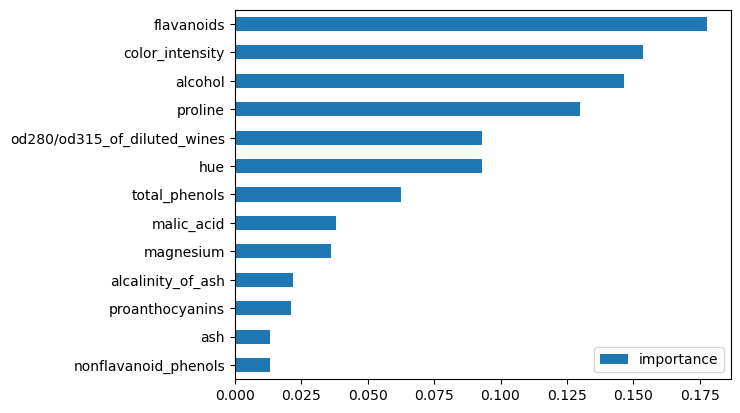

In [21]:
pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values(by='importance', ascending=True).plot(kind='barh')

<AxesSubplot:>

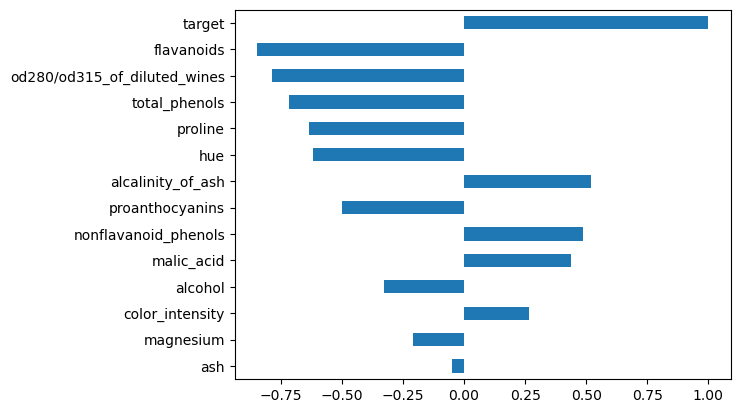

In [22]:
df.corr()['target'].sort_values(ascending=True,key=abs).plot(kind='barh')

In [23]:
import shap 

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

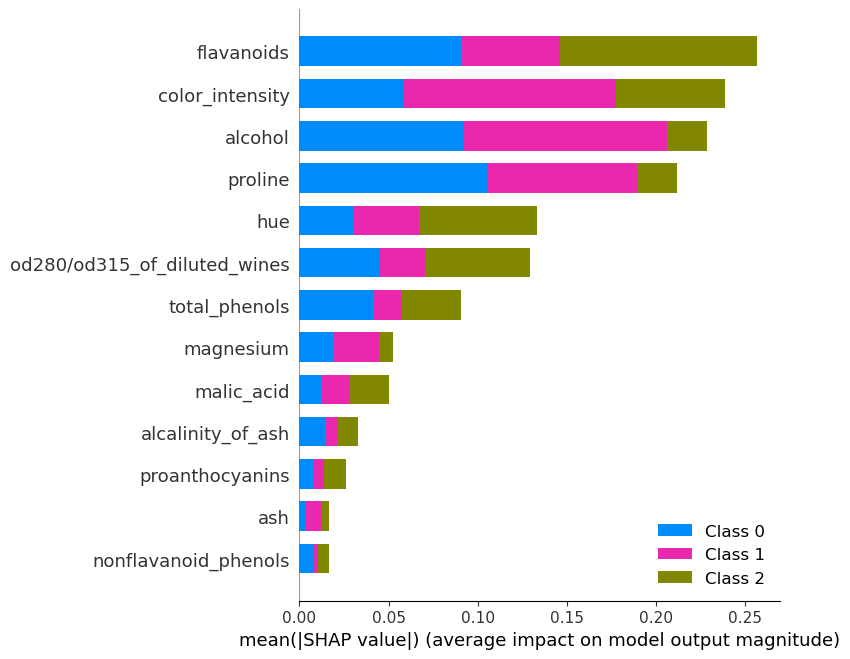

In [24]:
shap.initjs()
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [25]:
## 상관관계와 feature importance, shap 비교해 보았습니다. 모두 Flavanoids와 가장 중요한 feature로 나왔습니다.